# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### <b>Problem Defination: </b> •	In given dataset Rented Bike Count is dependent variable and all other are independent variable. Following to the problem we will try to put a machine learning regression model on the given dataset. Finally, with various models we are going to analyse the results.

In [315]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [316]:
# Importing the dataset
df = pd.read_csv(r'SeoulBikeData.csv',sep=',',encoding='latin')

### First view

In [317]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [318]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [319]:
df.shape

(8760, 14)

In [320]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [321]:
#Rename the Columns
column_dict = {'Date':'date', 'Rented Bike Count':'rented_bikes', 'Hour':'hour', 'Temperature(°C)':'temperature', 'Humidity(%)':'humidity', 'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility', 
               'Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radition', 'Rainfall(mm)':'rainfall', 'Snowfall (cm)': 'snowf'}

In [322]:
df.rename(columns= column_dict, inplace=True)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bikes           8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radition         8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowf                  8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [324]:
df.describe()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowf
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [325]:
len(df[df.duplicated()])

0

In [326]:
df.nunique()

date                      365
rented_bikes             2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radition            345
rainfall                   61
snowf                      51
Seasons                     4
Holiday                     2
Functioning Day             2
dtype: int64

In [327]:
len(df['date'].value_counts())*len(df['hour'].value_counts())

8760

### Extracting the 'date', 'month' from complete date

In [328]:
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [329]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

In [330]:
df['week'] = df['day_name'].apply(lambda x: "weekend" if x=='Saturday' or x == 'Sunday' else 'weekday')

In [331]:
df.head()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowf,Seasons,Holiday,Functioning Day,year,month,month_name,day,day_name,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


In [332]:
df.tail()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowf,Seasons,Holiday,Functioning Day,year,month,month_name,day,day_name,week
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday


In [333]:
df.columns

Index(['date', 'rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowf', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'month_name', 'day', 'day_name', 'week'],
      dtype='object')

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bikes           8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature            8760 non-null   float64       
 4   humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radition         8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowf                  8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

### Missing Values 

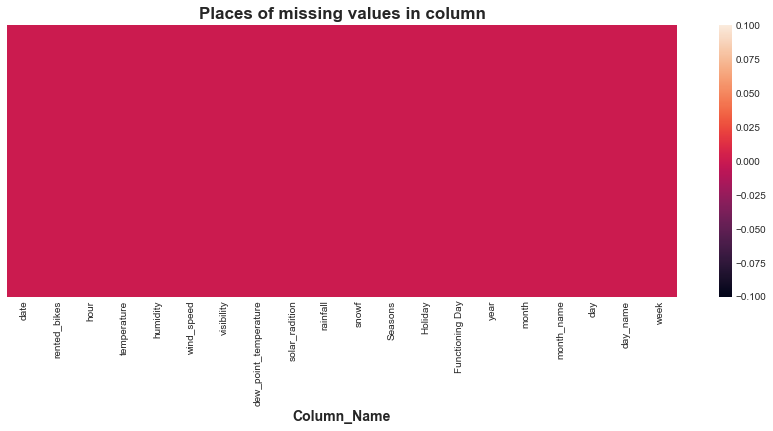

In [335]:
# No missin Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [336]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [337]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [338]:
# Try the database with functioning day

In [339]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [340]:
df.columns

Index(['date', 'rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowf', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'month_name', 'day', 'day_name', 'week'],
      dtype='object')

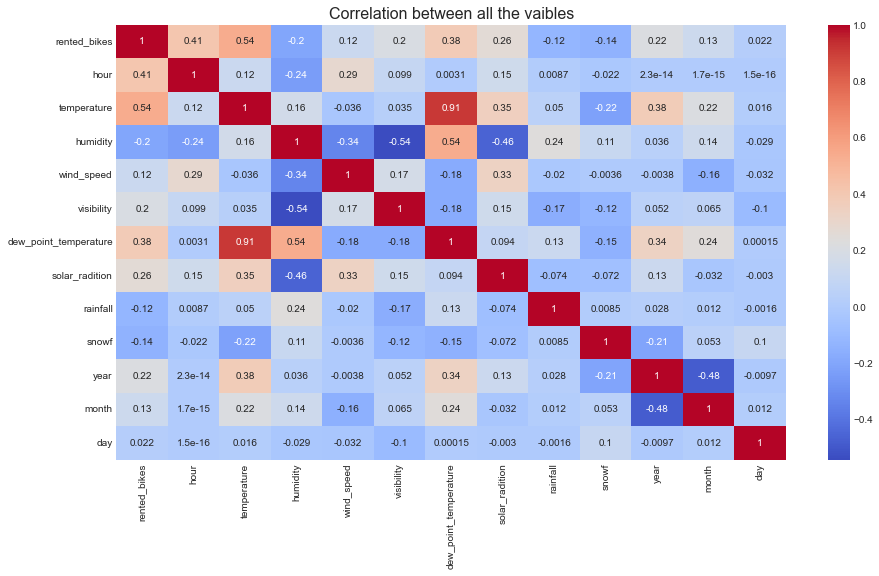

In [341]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [342]:
df.drop(columns= ['date','dew_point_temperature'], inplace=True)

In [343]:
df.head()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radition,rainfall,snowf,Seasons,Holiday,Functioning Day,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


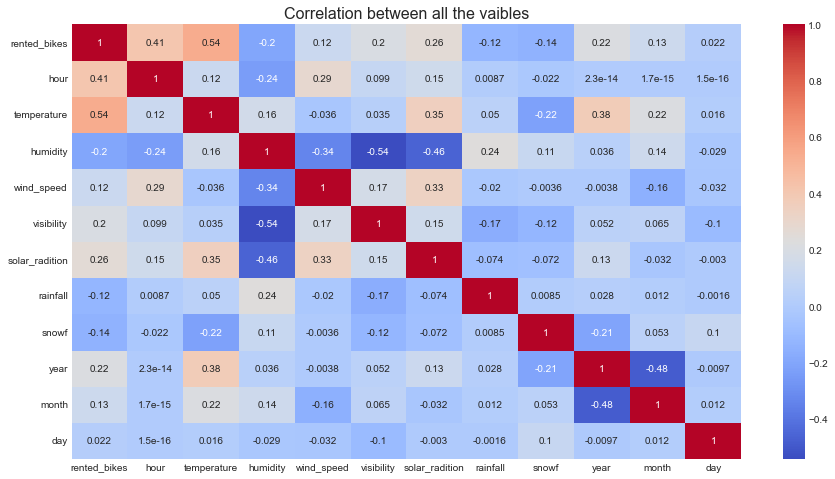

In [344]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

<AxesSubplot:>

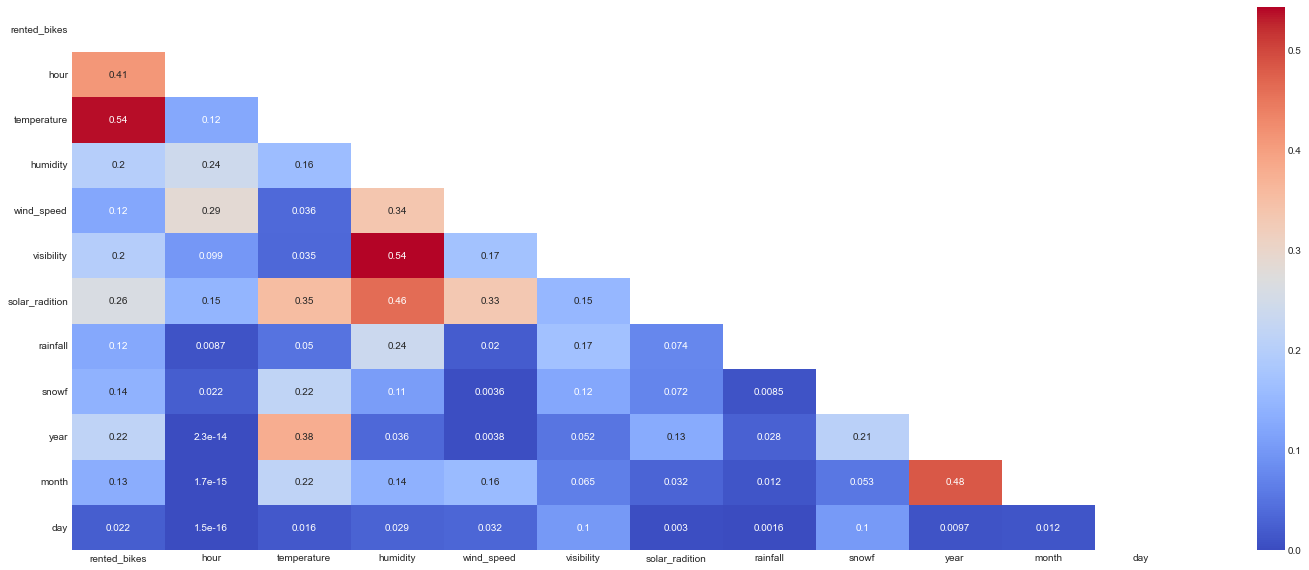

In [345]:
plt.figure(figsize=(25,10))
cor=df.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm')

## EDA of Every Feature

In [346]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowf', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rented_bikes     8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temperature      8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind_speed       8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   solar_radition   8760 non-null   float64
 7   rainfall         8760 non-null   float64
 8   snowf            8760 non-null   float64
 9   Seasons          8760 non-null   object 
 10  Holiday          8760 non-null   object 
 11  Functioning Day  8760 non-null   object 
 12  year             8760 non-null   int64  
 13  month            8760 non-null   int64  
 14  month_name       8760 non-null   object 
 15  day              8760 non-null   int64  
 16  day_name         8760 non-null   object 
 17  week          

### Distribution of numerical and Categorical Variables

In [348]:
# Converting columns into 'Categorical' and 'Numerical'

In [349]:
numerical_columns = ['rented_bikes','temperature','humidity','wind_speed','visibility','solar_radition','rainfall','snowf']
categorical_columns = ['hour','day','seasons','holiday', 'functioning_day', 'year','month','week']

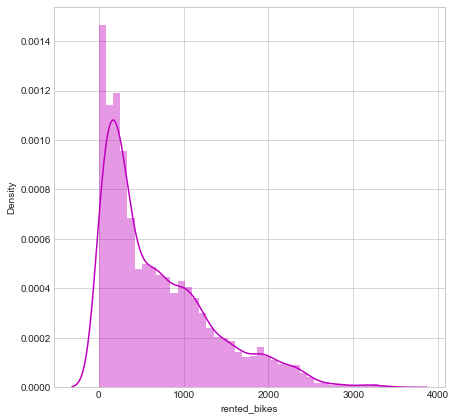

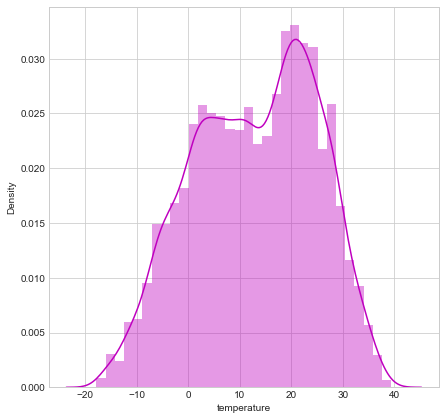

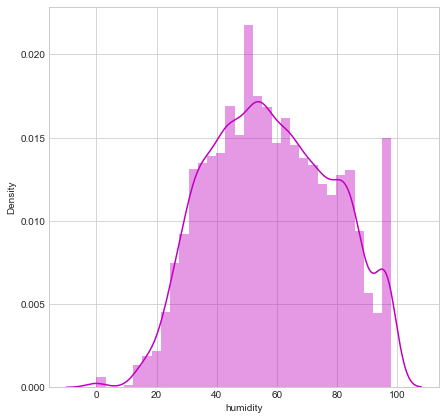

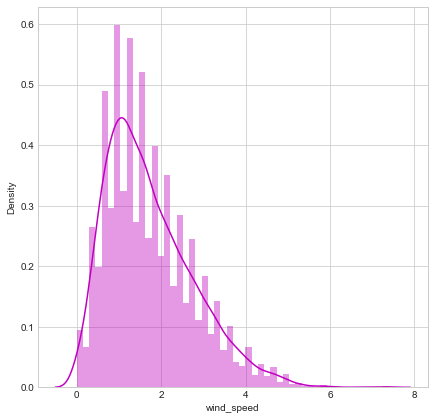

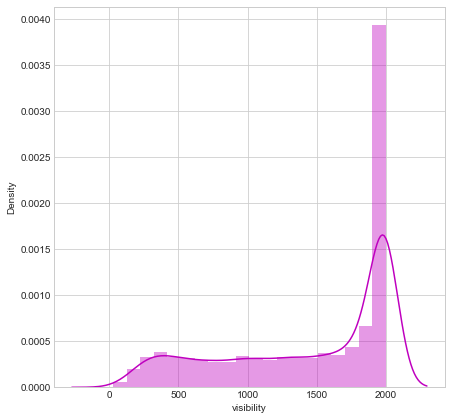

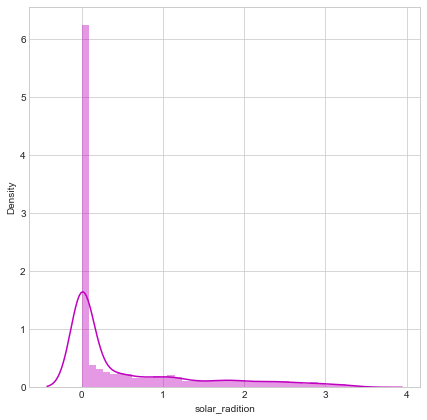

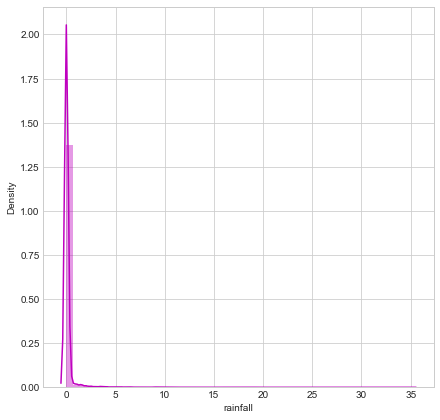

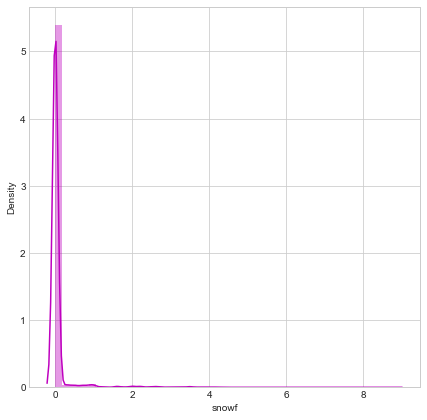

In [350]:
#distplot for numerical features
for val in numerical_columns:
  plt.figure(figsize=(7,7))
  plt.style.use('seaborn-whitegrid')
  sns.distplot(df[val],color="m")
  plt.show()

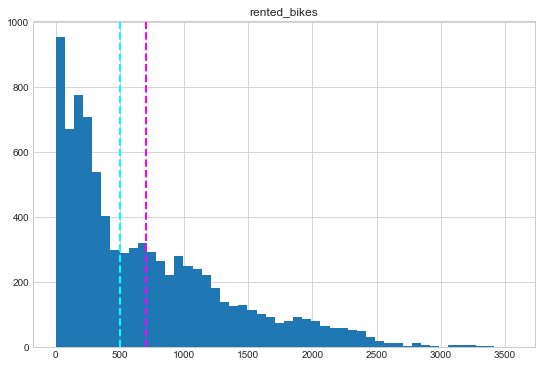

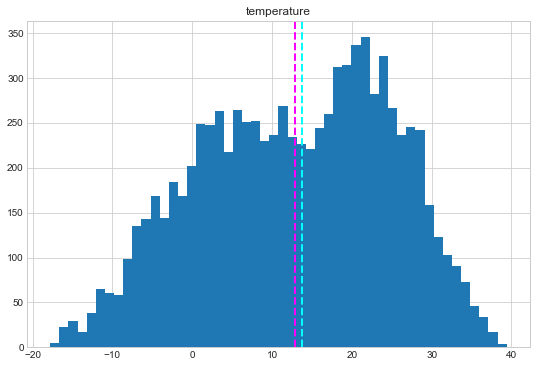

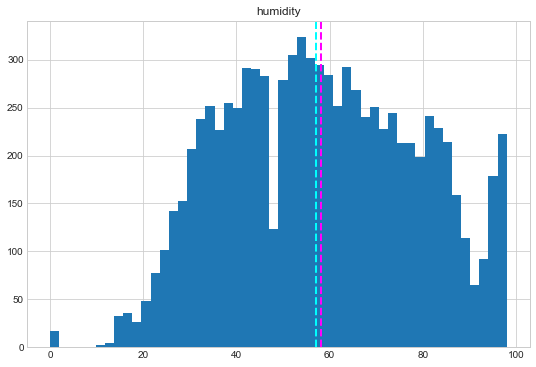

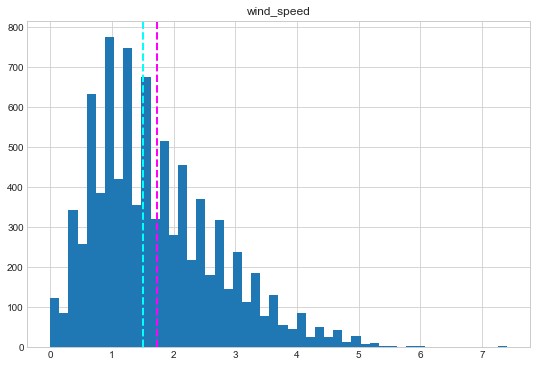

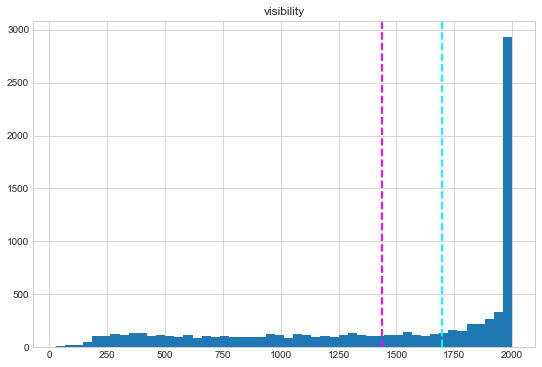

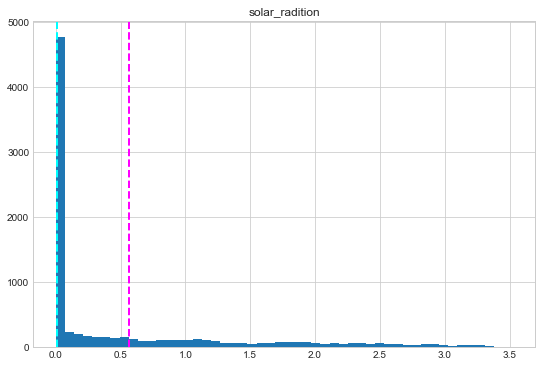

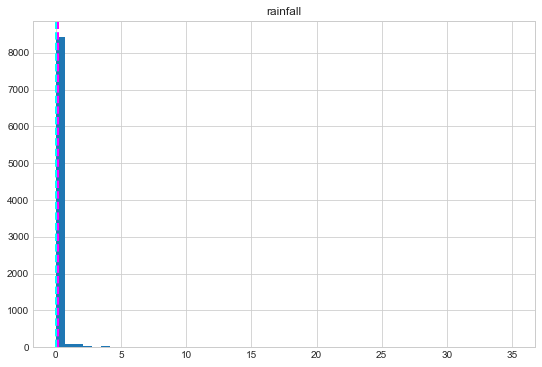

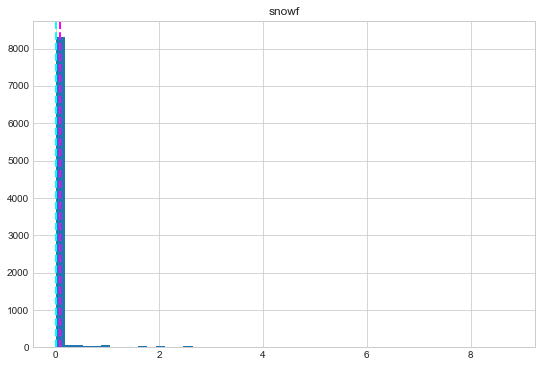

In [351]:
# plot a bar plot for each numerical feature count

for col in numerical_columns[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Co relation of Features with Rented bike count

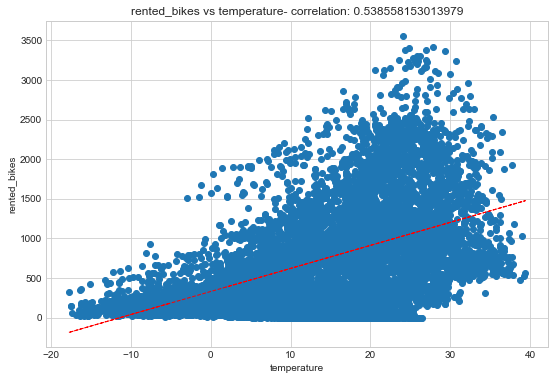

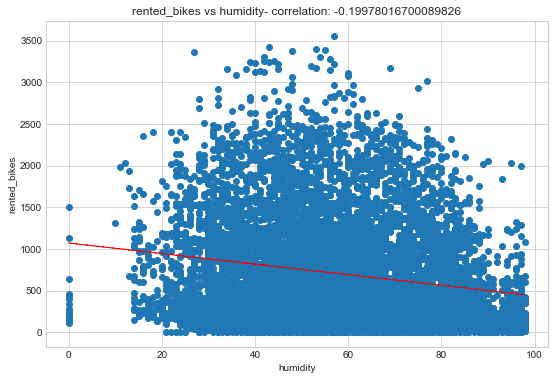

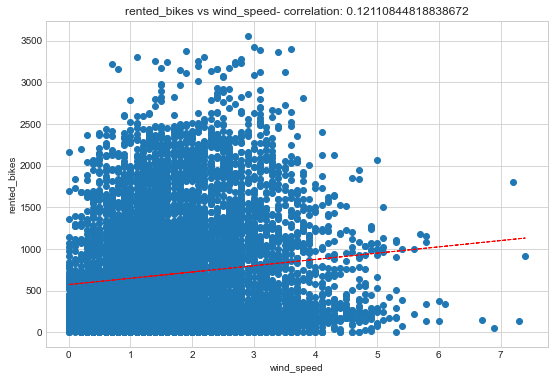

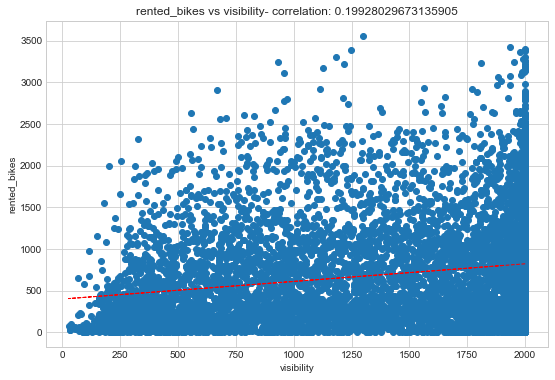

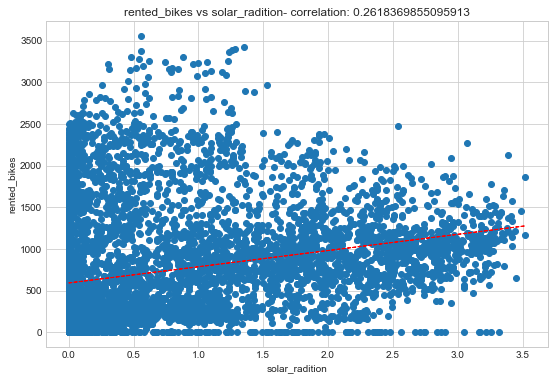

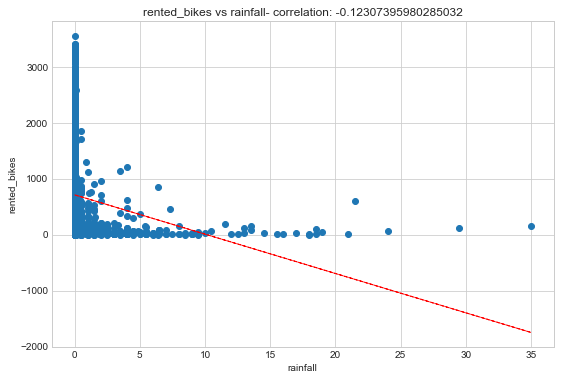

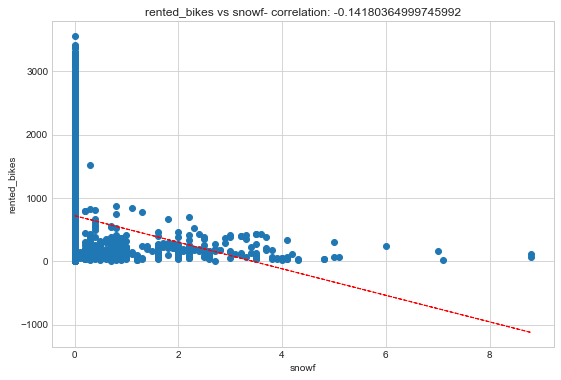

In [352]:
for col in numerical_columns[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['rented_bikes']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('rented_bikes')
    ax.set_title('rented_bikes vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['rented_bikes'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [353]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowf', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

### Bar Graphs for Rented Bikes and other features

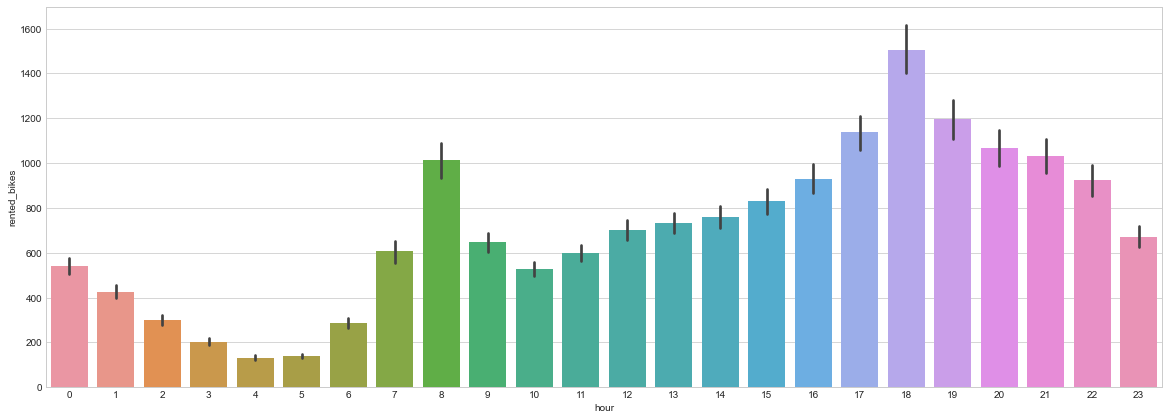

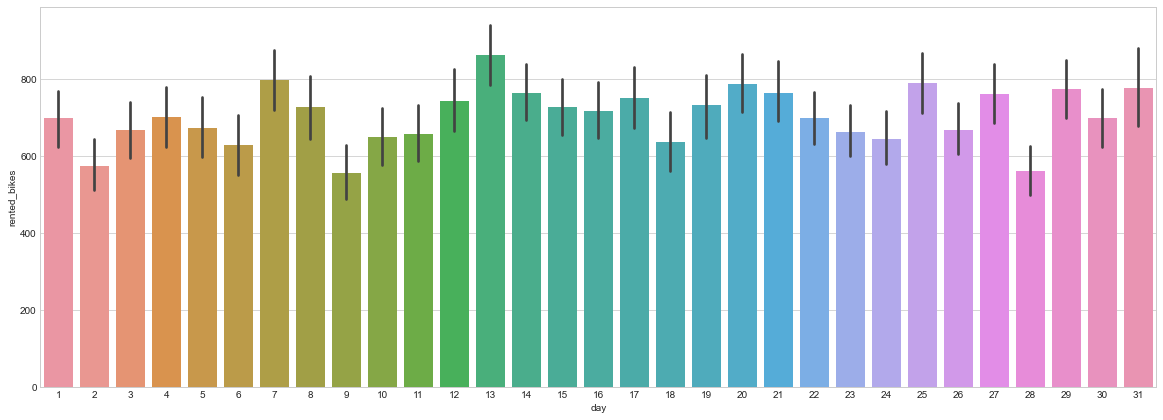

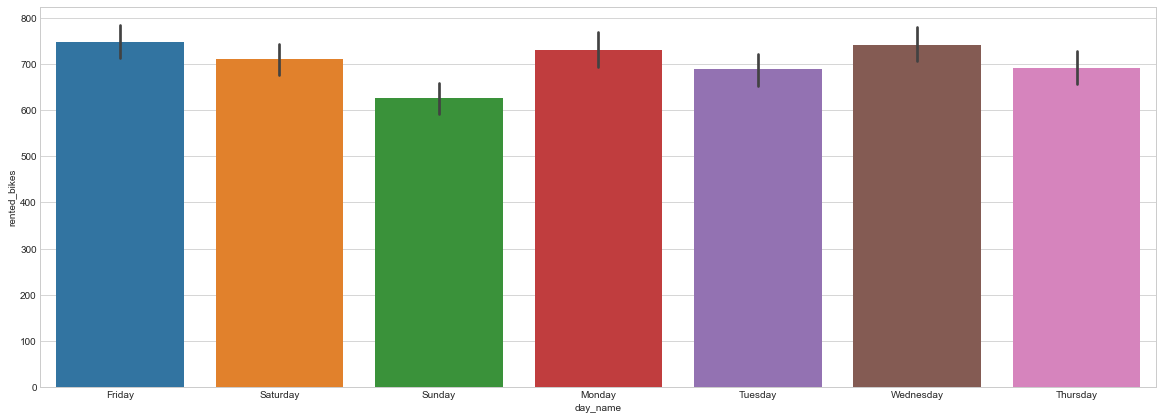

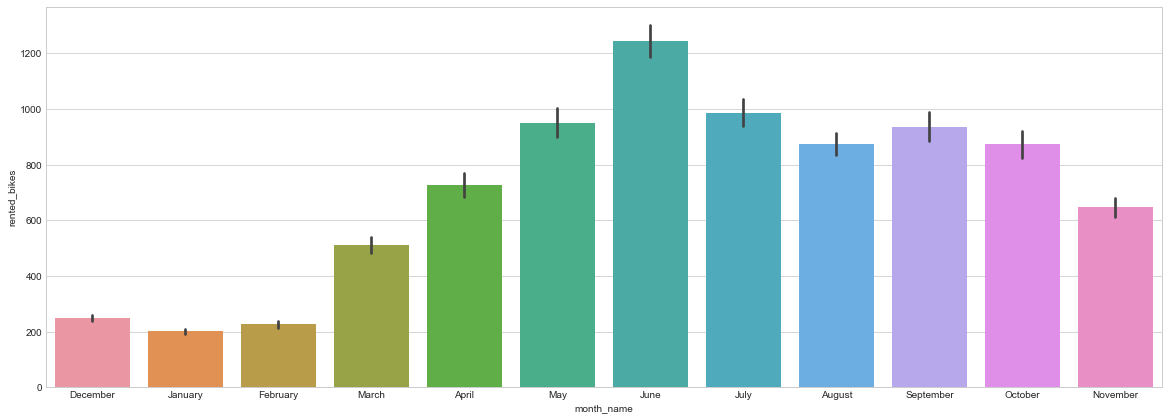

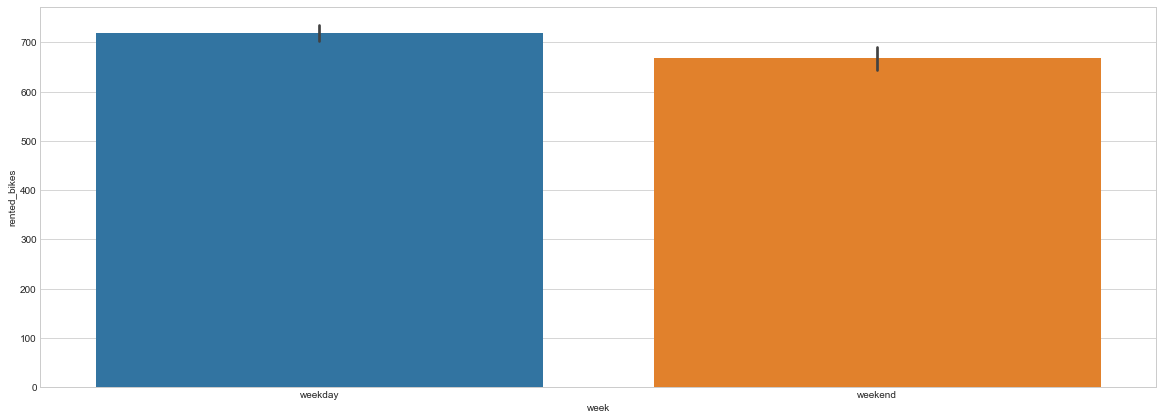

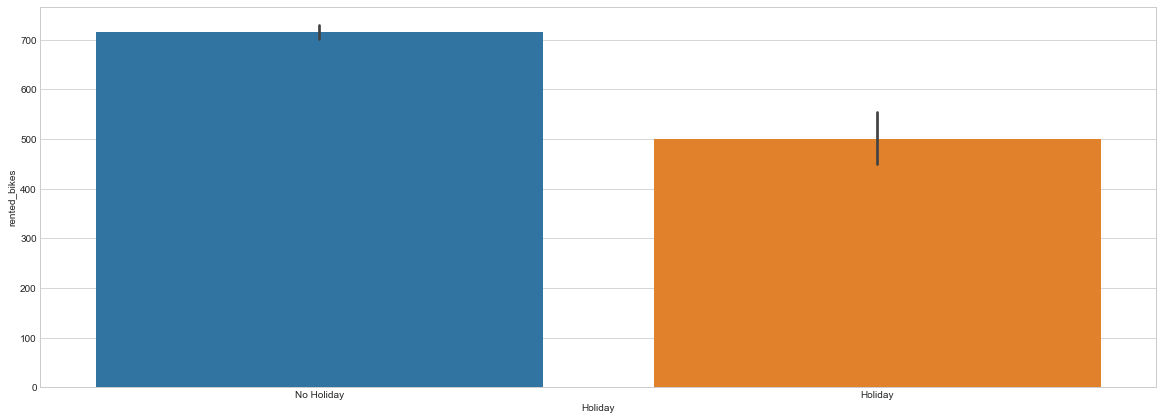

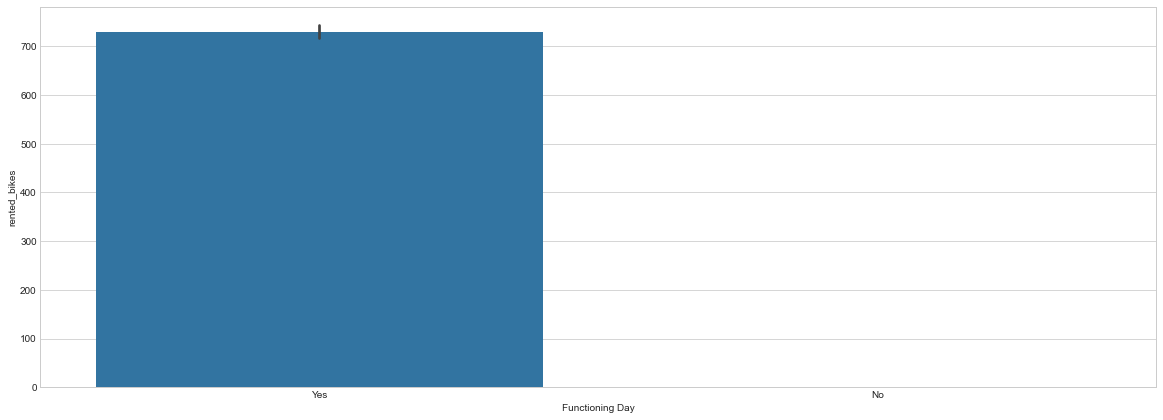

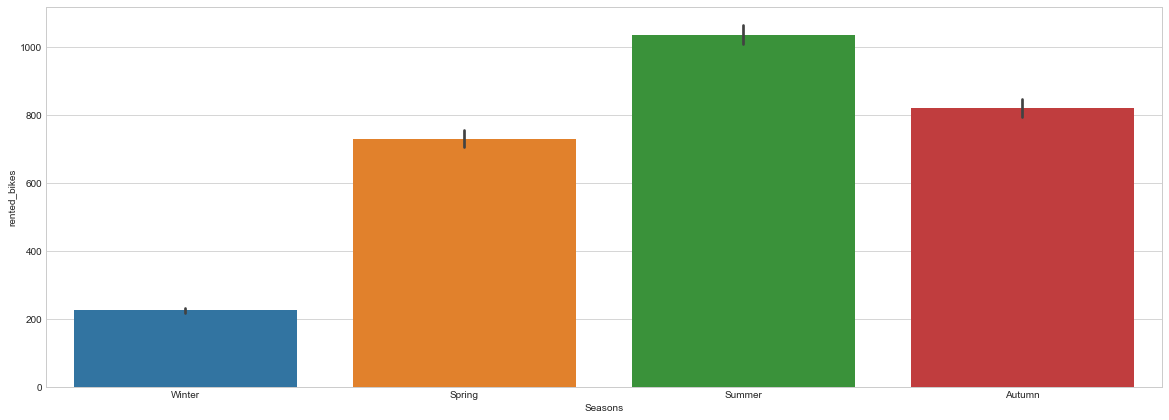

In [354]:
temp_list = ['hour','day', 'day_name', 'month_name', 'week','Holiday','Functioning Day','Seasons']
for col in temp_list:
  plt.figure(figsize=(20,7))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='rented_bikes')

### Check Outliars

In [355]:
print("Skewness: %f" % df['rented_bikes'].skew())
print("Kurtosis: %f" % df['rented_bikes'].kurt())

Skewness: 1.153428
Kurtosis: 0.853387


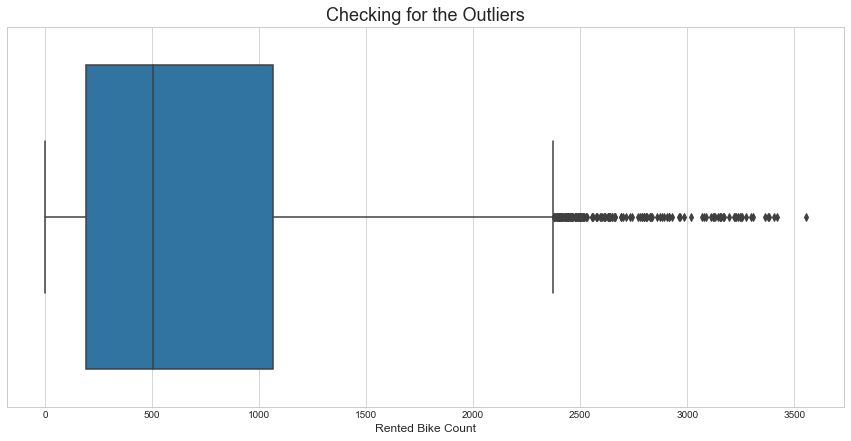

In [356]:
#box plot
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=df['rented_bikes'])
plt.title('Checking for the Outliers', size=18)
plt.xlabel('Rented Bike Count', size=12)
plt.show()


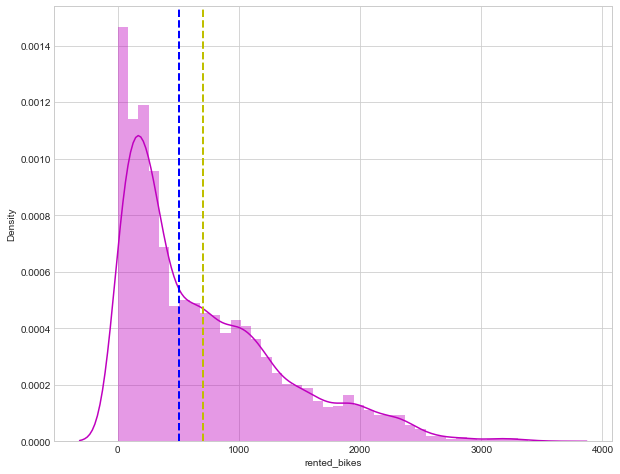

In [357]:
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
ax=sns.distplot(df['rented_bikes'],color="m")
ax.axvline((df['rented_bikes']).mean(), color='y', linestyle='dashed', linewidth=2)
ax.axvline((df['rented_bikes']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()


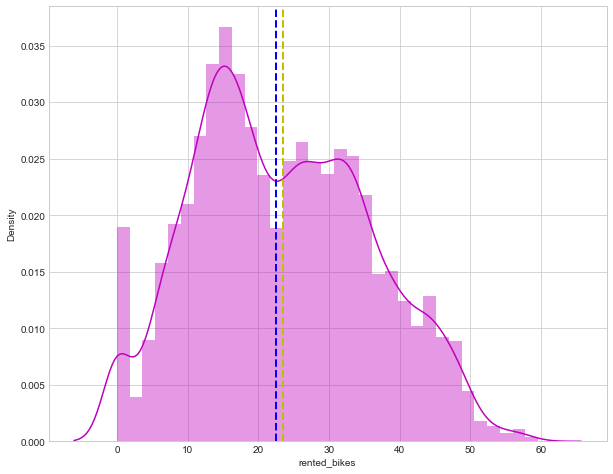

In [358]:
#Let's apply square root to reduce skewness
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
#plt.ylabel('Density')
ax=sns.distplot(np.sqrt(df['rented_bikes']),color="m")
ax.axvline(np.sqrt(df['rented_bikes']).mean(), color='y', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['rented_bikes']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()

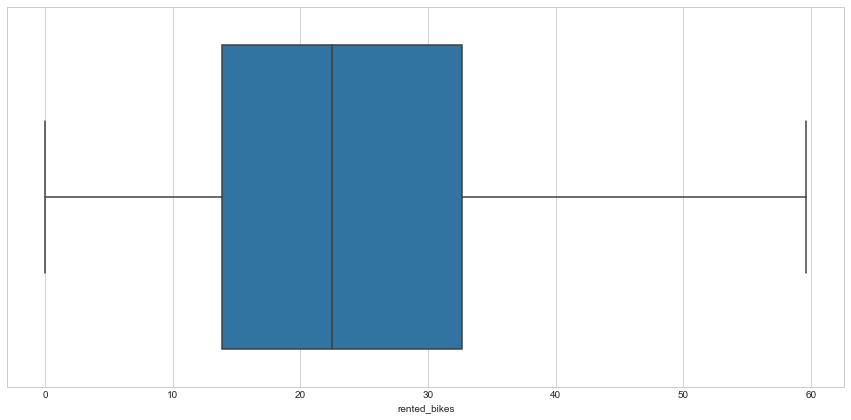

In [359]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.boxplot(x=np.sqrt(df['rented_bikes']))

plt.show()


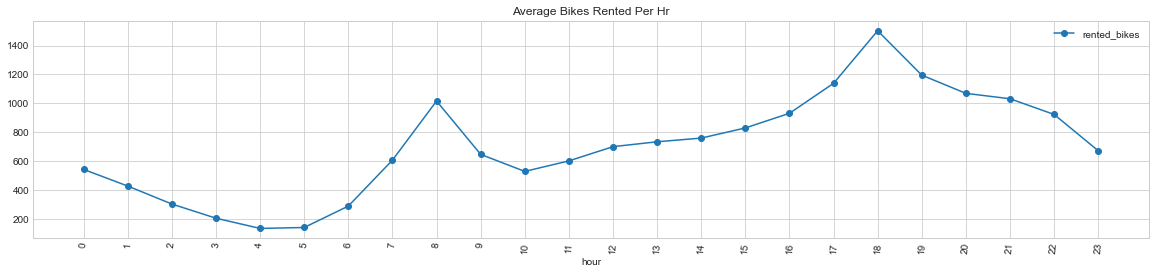

In [360]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('hour')['rented_bikes'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

In [361]:
dfVizSeasons=pd.DataFrame(df.groupby('Seasons').sum()['rented_bikes'].sort_values(ascending=False))
dfVizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,rented_bikes
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


In [362]:
dfVizSolarRadiation=pd.DataFrame(df.groupby('Seasons').sum()['solar_radition'].sort_values(ascending=False))
dfVizSolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,solar_radition
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


<AxesSubplot:ylabel='rented_bikes'>

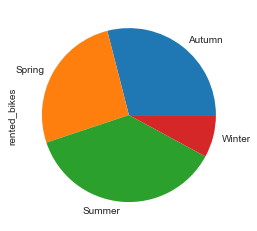

In [363]:
df.groupby('Seasons').sum()['rented_bikes'].plot.pie()

<AxesSubplot:ylabel='rented_bikes'>

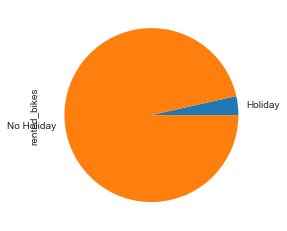

In [364]:
df.groupby('Holiday').sum()['rented_bikes'].plot.pie(radius=1)

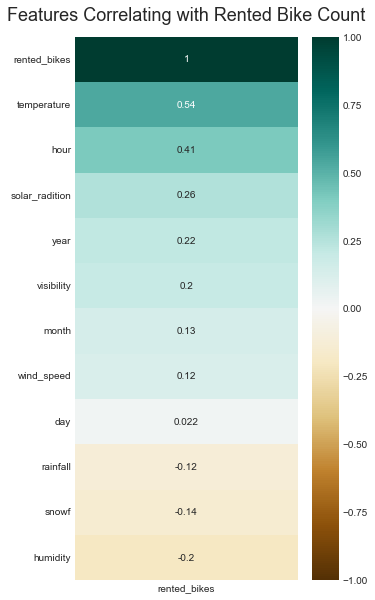

In [365]:
corrMatrix = df.corr()
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['rented_bikes']].sort_values(by='rented_bikes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);

### VIF factor

In [366]:
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [367]:
#calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bikes']]])
calc_vif(df[[i for i in numerical_columns if i not in ['rented_bikes']]])

,variables,VIF
0,temperature,3.166007
1,humidity,4.758651
2,wind_speed,4.079926
3,visibility,4.409448
4,solar_radition,2.246238
5,rainfall,1.078501
6,snowf,1.118901


In [368]:
df.columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radition', 'rainfall', 'snowf', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'month_name', 'day',
       'day_name', 'week'],
      dtype='object')

In [369]:
df_copy = df.copy()

In [370]:
df_copy['visibility'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: visibility, Length: 1789, dtype: int64

In [371]:
df_copy['Functioning Day']  = df['Functioning Day'].apply(lambda x: 0 if x == 'No' else 1)

In [372]:
df_copy['visibility'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: visibility, Length: 1789, dtype: int64

In [373]:
#'visibility','solar_radition', 'rainfall' and 'snowfall' are highly skewed so we will convert them into categorical
df_copy['solar_radition'] = df_copy['solar_radition'].apply(lambda x: 0 if x==0.00 else 1)
df_copy['snowf'] = df_copy['snowf'].apply(lambda x: 0 if x==0.0 else 1)
df_copy['rainfall'] = df_copy['rainfall'].apply(lambda x: 0 if x==0.0 else 1)
df_copy['visibility'] = df_copy['visibility'].apply(lambda x: 0 if x<2000 else(1 if 1000<x<2000 else 2))

In [374]:
df_copy.head()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radition,rainfall,snowf,Seasons,Holiday,Functioning Day,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2,0,0,0,Winter,No Holiday,1,2017,12,December,1,Friday,weekday


In [375]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rented_bikes     8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temperature      8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind_speed       8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   solar_radition   8760 non-null   int64  
 7   rainfall         8760 non-null   int64  
 8   snowf            8760 non-null   int64  
 9   Seasons          8760 non-null   object 
 10  Holiday          8760 non-null   object 
 11  Functioning Day  8760 non-null   int64  
 12  year             8760 non-null   int64  
 13  month            8760 non-null   int64  
 14  month_name       8760 non-null   object 
 15  day              8760 non-null   int64  
 16  day_name         8760 non-null   object 
 17  week          

In [376]:
df_copy = pd.get_dummies(df_copy, columns = ['hour','visibility', 'Seasons', 'Holiday', 'month','day_name','week'])
df_copy


,rented_bikes,temperature,humidity,wind_speed,solar_radition,rainfall,snowf,Functioning Day,year,month_name,...,month_12,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,week_weekday,week_weekend
0,254,-5.2,37,2.2,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,0,0,0,1,2017,December,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0,0,0,1,2018,November,...,0,1,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0,0,0,1,2018,November,...,0,1,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0,0,0,1,2018,November,...,0,1,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0,0,0,1,2018,November,...,0,1,0,0,0,0,0,0,1,0


In [377]:
df_copy = df_copy.drop(columns=['year','month_name','day'])

In [378]:
df_copy

,rented_bikes,temperature,humidity,wind_speed,solar_radition,rainfall,snowf,Functioning Day,hour_0,hour_1,...,month_12,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,week_weekday,week_weekend
0,254,-5.2,37,2.2,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [379]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rented_bikes        8760 non-null   int64  
 1   temperature         8760 non-null   float64
 2   humidity            8760 non-null   int64  
 3   wind_speed          8760 non-null   float64
 4   solar_radition      8760 non-null   int64  
 5   rainfall            8760 non-null   int64  
 6   snowf               8760 non-null   int64  
 7   Functioning Day     8760 non-null   int64  
 8   hour_0              8760 non-null   uint8  
 9   hour_1              8760 non-null   uint8  
 10  hour_2              8760 non-null   uint8  
 11  hour_3              8760 non-null   uint8  
 12  hour_4              8760 non-null   uint8  
 13  hour_5              8760 non-null   uint8  
 14  hour_6              8760 non-null   uint8  
 15  hour_7              8760 non-null   uint8  
 16  hour_8

In [380]:
df1 = df_copy.copy()

In [381]:
df1.head()

,rented_bikes,temperature,humidity,wind_speed,solar_radition,rainfall,snowf,Functioning Day,hour_0,hour_1,...,month_12,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,week_weekday,week_weekend
0,254,-5.2,37,2.2,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rented_bikes     8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temperature      8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind_speed       8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   solar_radition   8760 non-null   float64
 7   rainfall         8760 non-null   float64
 8   snowf            8760 non-null   float64
 9   Seasons          8760 non-null   object 
 10  Holiday          8760 non-null   object 
 11  Functioning Day  8760 non-null   object 
 12  year             8760 non-null   int64  
 13  month            8760 non-null   int64  
 14  month_name       8760 non-null   object 
 15  day              8760 non-null   int64  
 16  day_name         8760 non-null   object 
 17  week          

In [383]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rented_bikes        8760 non-null   int64  
 1   temperature         8760 non-null   float64
 2   humidity            8760 non-null   int64  
 3   wind_speed          8760 non-null   float64
 4   solar_radition      8760 non-null   int64  
 5   rainfall            8760 non-null   int64  
 6   snowf               8760 non-null   int64  
 7   Functioning Day     8760 non-null   int64  
 8   hour_0              8760 non-null   uint8  
 9   hour_1              8760 non-null   uint8  
 10  hour_2              8760 non-null   uint8  
 11  hour_3              8760 non-null   uint8  
 12  hour_4              8760 non-null   uint8  
 13  hour_5              8760 non-null   uint8  
 14  hour_6              8760 non-null   uint8  
 15  hour_7              8760 non-null   uint8  
 16  hour_8

In [384]:
df1.drop(['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter','day_name_Saturday','day_name_Sunday','week_weekend'], axis=1, inplace=True)

In [385]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rented_bikes        8760 non-null   int64  
 1   temperature         8760 non-null   float64
 2   humidity            8760 non-null   int64  
 3   wind_speed          8760 non-null   float64
 4   solar_radition      8760 non-null   int64  
 5   rainfall            8760 non-null   int64  
 6   snowf               8760 non-null   int64  
 7   Functioning Day     8760 non-null   int64  
 8   hour_0              8760 non-null   uint8  
 9   hour_1              8760 non-null   uint8  
 10  hour_2              8760 non-null   uint8  
 11  hour_3              8760 non-null   uint8  
 12  hour_4              8760 non-null   uint8  
 13  hour_5              8760 non-null   uint8  
 14  hour_6              8760 non-null   uint8  
 15  hour_7              8760 non-null   uint8  
 16  hour_8

### Train and test splits

In [386]:
y = (df_copy['rented_bikes'])

In [387]:
X = df_copy.drop(columns = ['rented_bikes'])

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

(7008, 60)
(1752, 60)


### Linear Regression

In [389]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.724854067587684

In [390]:
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

In [391]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

#Adjuste_R2 

MSE= 115071.02299223914
RMSE= 339.2212006821495
R2_Score= 0.724854067587684


In [392]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 112113.77576399721
RMSE= 334.83395252572166
R2_Score= 0.7238976226436864


In [393]:
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

R2_Score= 0.7238976226436864


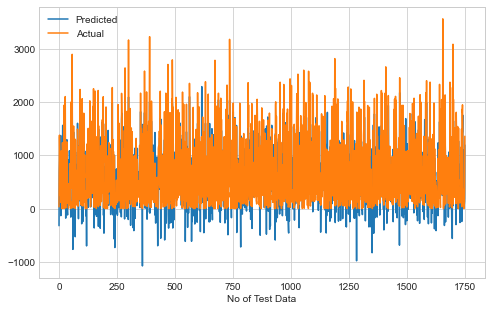

In [394]:
#Plot the figure
plt.figure(figsize=(8,5))
plt.plot(pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### Lasso Regression

In [395]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [396]:
lasso.score(X_train, y_train)

0.7248540488414952

In [397]:
y_pred=lasso.predict(X_test)

In [398]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [399]:
r2

0.7238991887661805

In [400]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [401]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -117269.32604952094


In [402]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [403]:
y_pred_lasso_train = lasso_regressor.predict(X_train)

In [404]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 112102.68220382255
RMSE : 334.8173863523556
R2 : 0.7239249427327361
Adjusted R2 :  0.714129257672987


In [405]:
MSE  = mean_squared_error(y_train, y_pred_lasso_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_lasso_train)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_lasso_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 115071.1430995165
RMSE : 339.2213777159637
R2 : 0.7248537803995809
Adjusted R2 :  0.7150910523238712


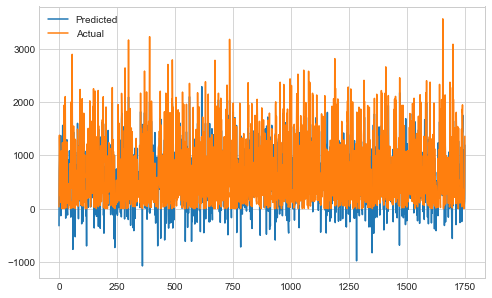

In [406]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

### Ridge Regression

In [407]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [408]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -117399.42637666925


In [409]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [410]:
y_pred_ridge_train = ridge_regressor.predict(X_train)

In [411]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 112092.51715519269
RMSE : 334.8022060190056
R2 : 0.7239499761782117
Adjusted R2 :  0.7141551793542571


In [412]:
MSE  = mean_squared_error(y_train, y_pred_ridge_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_ridge_train)

MSE : 115073.23423589222
RMSE : 339.2244599610886


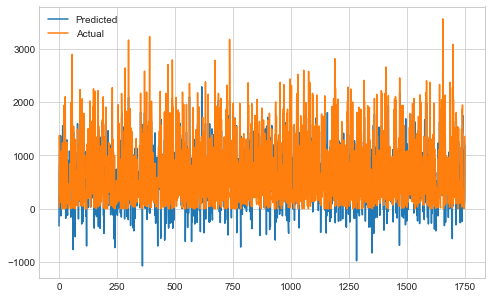

In [413]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

### Elastic Net

In [414]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [415]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [416]:
elasticnet.score(X_train, y_train)

0.6241716391740605

In [417]:
y_pred_en = elasticnet.predict(X_test)

In [418]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 151650.635398096
RMSE : 389.42346539223337
R2 : 0.6265302753771336
Adjusted R2 :  0.6132788363012187


In [419]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [420]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.7}

Using  {'alpha': 0.001, 'l1_ratio': 0.7}  the negative mean squared error is:  -117260.51432877863


In [421]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [422]:
pred_train = elastic_regressor.predict(X_train)

In [423]:
MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 112074.51115044387
RMSE : 334.7753144281159
R2 : 0.7239943195310597
Adjusted R2 :  0.714201096096325


In [424]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 115080.73989593174
RMSE= 339.2355227506868
R2_Score= 0.7248308335322534


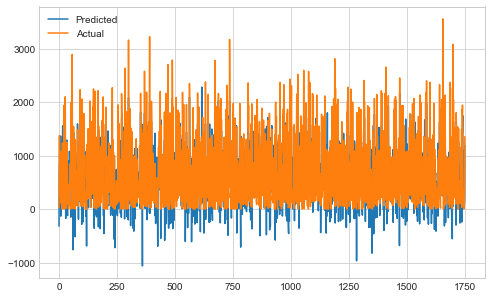

In [425]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

### Decision Tree Regressor

In [426]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

In [427]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [428]:
y_pred=tree.predict(X_test)

In [429]:
pred_train = tree.predict(X_train)

In [430]:
r2_score(y_train, pred_train)

1.0

In [431]:
r2_score(y_test, y_pred)

0.8386924622121136

In [432]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8329689540706156


In [433]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 65500.33105022831
RMSE : 255.9303246007169


In [434]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 0.0
RMSE= 0.0
R2_Score= 1.0


Text(0, 0.5, 'Predicted')

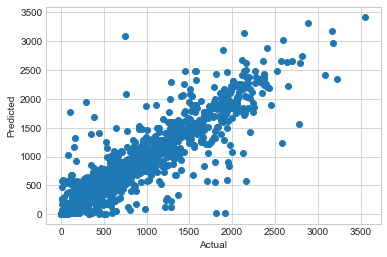

In [435]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

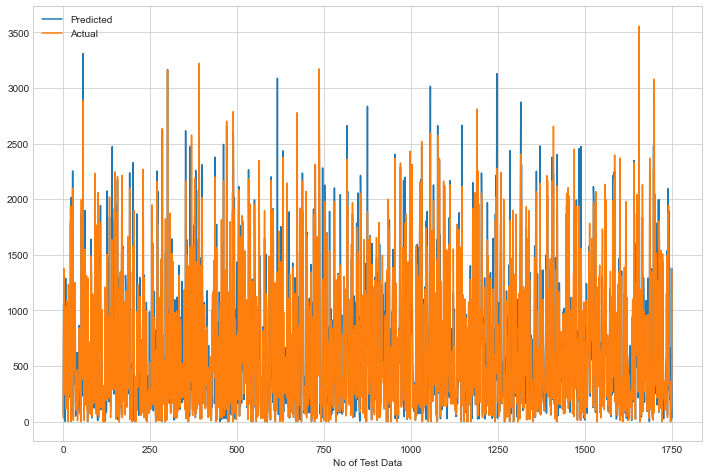

In [436]:
plt.figure(figsize=(12,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [437]:
tree.feature_importances_


array([3.14191534e-01, 1.31031656e-01, 1.41328879e-02, 3.24683456e-02,
       2.18236410e-02, 3.36456058e-04, 8.08091549e-02, 7.09953535e-03,
       3.96374299e-03, 3.16532389e-03, 4.76396569e-03, 5.12997163e-03,
       3.76687574e-03, 3.66184559e-03, 5.78057288e-03, 2.34442825e-02,
       7.19775351e-04, 1.30180423e-03, 4.40733964e-04, 1.34213773e-03,
       8.13678883e-04, 9.94555075e-04, 2.05069796e-03, 6.51555513e-03,
       2.71820540e-02, 7.06308703e-02, 3.45678646e-02, 2.60001947e-02,
       2.67942390e-02, 1.57722990e-02, 1.17116687e-02, 1.74436619e-03,
       7.19112768e-04, 6.74724696e-03, 2.93667041e-03, 1.57763325e-03,
       2.77641376e-02, 4.31969109e-03, 2.31152625e-03, 4.71841493e-05,
       2.39527479e-05, 3.92224022e-03, 1.61450148e-03, 3.16952819e-03,
       5.45145593e-03, 1.05965270e-03, 2.34851377e-03, 6.93723750e-04,
       2.47960957e-03, 3.09974591e-04, 2.43215013e-04, 1.67075329e-03,
       1.42356449e-03, 1.66278812e-03, 1.97465748e-03, 1.38974153e-03,
      

In [438]:
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

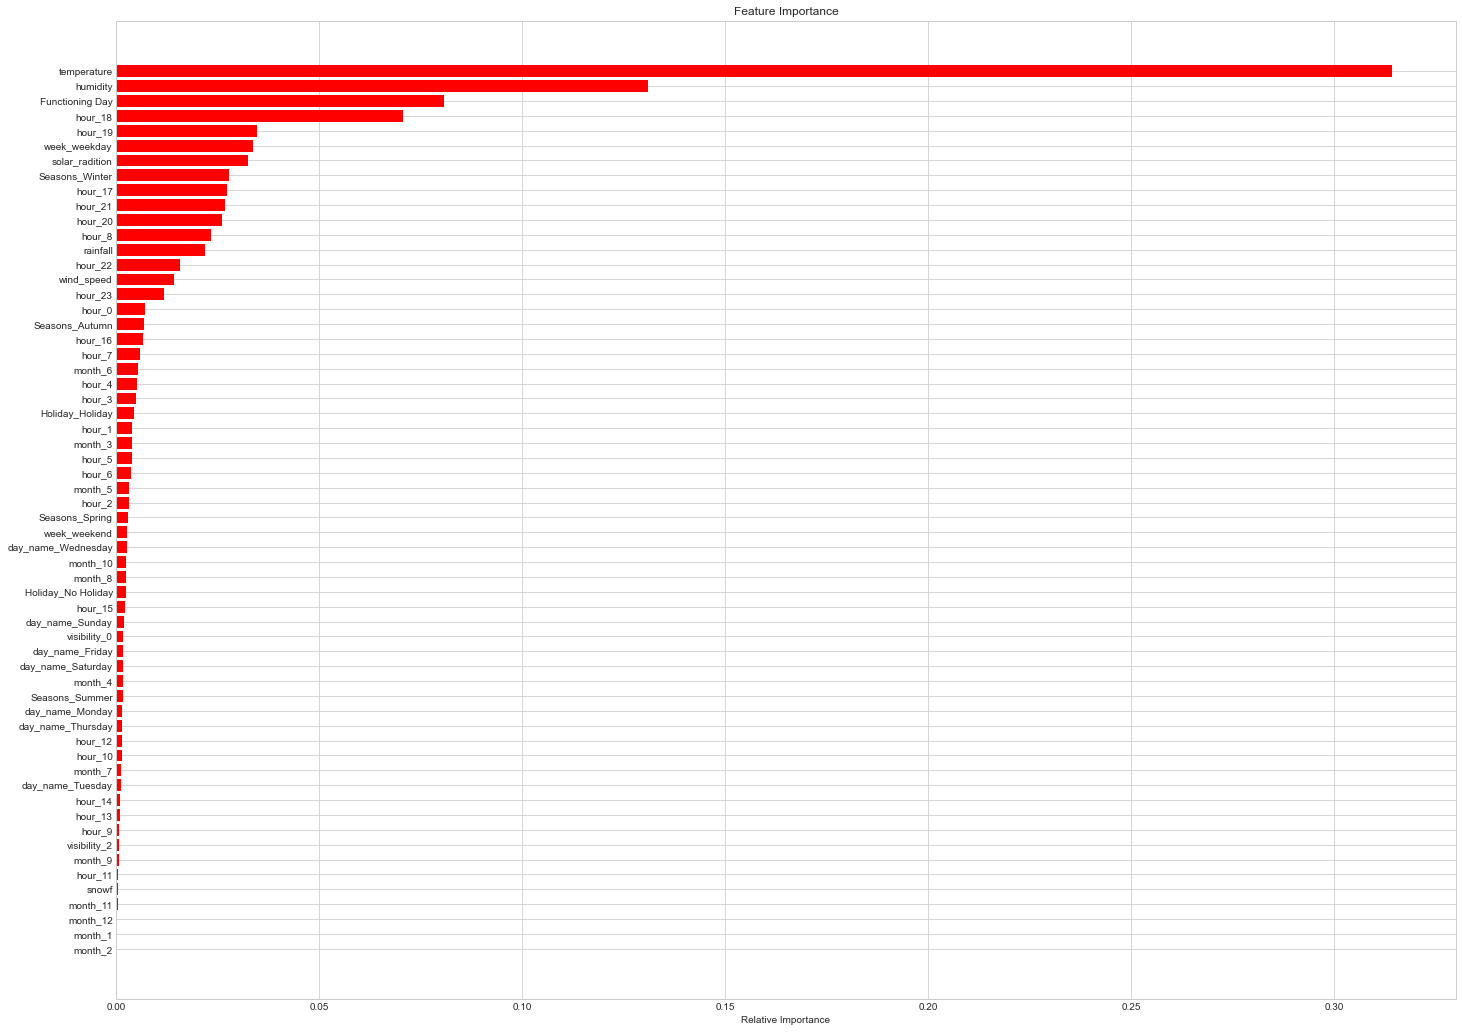

In [439]:
plt.figure(figsize=(24,18))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()